In [1]:
#from torch.utils.data import *
from sklearn.metrics import roc_curve, auc
from torch.utils.data import ConcatDataset, Dataset, DataLoader, sampler, DistributedSampler

import pyarrow.parquet as pq
import pyarrow as pa # pip install pyarrow==0.7.1
import ROOT
import numpy as np
np.random.seed(0)
import glob, os

import dask.array as da

Welcome to JupyROOT 6.28/06


In [2]:
from ROOT import TCanvas, TPad, TFile, TPaveText, TLegend
from ROOT import gBenchmark, gStyle, gROOT, TStyle
from ROOT import TH1D, TF1, TGraphErrors, TMultiGraph

In [3]:
histName = ['ECAL_energy', 'HBHE_energy','ECAL_tracksPt_atECALfixIP','ECAL_tracksD0Sig_atECALfixIP','ECAL_tracksDzSig_atECALfixIP',
         'BPIX_layer1_ECAL_atPV','BPIX_layer2_ECAL_atPV', 'BPIX_layer3_ECAL_atPV','BPIX_layer4_ECAL_atPV',
         'TIB_layer1_ECAL_atPV','TIB_layer2_ECAL_atPV','TOB_layer1_ECAL_atPV','TOB_layer2_ECAL_atPV']

histTitles = ['ECAL energy (GeV)', 'HCAL energy (GeV)','Track pT (GeV)','D0 Significance','Dz Significance',
         'BPIX layer1','BPIX layer2', 'BPIX layer3','BPIX layer4', 
         'TIB layer1','TIB layer2','TOB layer1','TOB layer2']

saveHists = ['ECAL_energy', 'HCAL_energy','Track_pT','D0_Significance','Dz_Significance',
         'BPIX_layer1','BPIX_layer2', 'BPIX_layer3','BPIX_layer4', 
         'TIB_layer1','TIB_layer2','TOB_layer1','TOB_layer2']

In [4]:
histograms = {}

In [5]:
files_ = []

files_.append(TFile.Open('output_dataTau.root'))

In [6]:
for iHist in histName: 
    histograms[iHist] = files_[0].Get('fevt/'+iHist)
    

In [7]:
histograms

{'ECAL_energy': <cppyy.gbl.TProfile2D object at 0x10445110>,
 'HBHE_energy': <cppyy.gbl.TProfile2D object at 0x1050ede0>,
 'ECAL_tracksPt_atECALfixIP': <cppyy.gbl.TProfile2D object at 0x1050c0a0>,
 'ECAL_tracksD0Sig_atECALfixIP': <cppyy.gbl.TProfile2D object at 0x1050c580>,
 'ECAL_tracksDzSig_atECALfixIP': <cppyy.gbl.TProfile2D object at 0x1050ca60>,
 'BPIX_layer1_ECAL_atPV': <cppyy.gbl.TH2F object at 0x1050d0c0>,
 'BPIX_layer2_ECAL_atPV': <cppyy.gbl.TH2F object at 0x10612310>,
 'BPIX_layer3_ECAL_atPV': <cppyy.gbl.TH2F object at 0x10610750>,
 'BPIX_layer4_ECAL_atPV': <cppyy.gbl.TH2F object at 0x10610b60>,
 'TIB_layer1_ECAL_atPV': <cppyy.gbl.TH2F object at 0x10611110>,
 'TIB_layer2_ECAL_atPV': <cppyy.gbl.TH2F object at 0x10617a90>,
 'TOB_layer1_ECAL_atPV': <cppyy.gbl.TH2F object at 0x106115c0>,
 'TOB_layer2_ECAL_atPV': <cppyy.gbl.TH2F object at 0x10617260>}

In [8]:
def drawHistograms(hist, histTitle, saveHist):
    print(hist)
    canvas = ROOT.TCanvas("canvas", "Profile Histogram", 800, 600)
    ROOT.gStyle.SetOptStat(0)
    hist.SetTitle(histTitle)
    hist.Draw("colz")  # "E" option draws the histogram with errors

    ROOT.gPad.Update()
    # Show the canvas
    canvas.Draw()
    canvas.Update()
    #canvas.SaveAs('ECAL_energy.C')
    canvas.SaveAs(saveHist+'.png')
    

In [9]:
for index, (key, value) in enumerate(list(histograms.items())):
#for i in range(len(histograms)):
    #print(histograms.keys()[i])
    drawHistograms(histograms[key],histTitles[index],saveHists[index])

Name: ECAL_energy Title: E(i#phi,i#eta) NbinsX: 360
Name: HBHE_energy Title: E(i#phi,i#eta) NbinsX: 72
Name: ECAL_tracksPt_atECALfixIP Title: E(i#phi,i#eta) NbinsX: 360
Name: ECAL_tracksD0Sig_atECALfixIP Title: E(i#phi,i#eta) NbinsX: 360
Name: ECAL_tracksDzSig_atECALfixIP Title: E(i#phi,i#eta) NbinsX: 360
Name: BPIX_layer1_ECAL_atPV Title: N(i#phi,i#eta) NbinsX: 360
Name: BPIX_layer2_ECAL_atPV Title: N(i#phi,i#eta) NbinsX: 360
Name: BPIX_layer3_ECAL_atPV Title: N(i#phi,i#eta) NbinsX: 360
Name: BPIX_layer4_ECAL_atPV Title: N(i#phi,i#eta) NbinsX: 360
Name: TIB_layer1_ECAL_atPV Title: N(i#phi,i#eta) NbinsX: 360
Name: TIB_layer2_ECAL_atPV Title: N(i#phi,i#eta) NbinsX: 360
Name: TOB_layer1_ECAL_atPV Title: N(i#phi,i#eta) NbinsX: 360
Name: TOB_layer2_ECAL_atPV Title: N(i#phi,i#eta) NbinsX: 360


Info in <TCanvas::Print>: png file ECAL_energy.png has been created
Info in <TCanvas::Print>: png file HCAL_energy.png has been created
Info in <TCanvas::Print>: png file Track_pT.png has been created
Info in <TCanvas::Print>: png file D0_Significance.png has been created
Info in <TCanvas::Print>: png file Dz_Significance.png has been created
Info in <TCanvas::Print>: png file BPIX_layer1.png has been created
Info in <TCanvas::Print>: png file BPIX_layer2.png has been created
Info in <TCanvas::Print>: png file BPIX_layer3.png has been created
Info in <TCanvas::Print>: png file BPIX_layer4.png has been created
Info in <TCanvas::Print>: png file TIB_layer1.png has been created
Info in <TCanvas::Print>: png file TIB_layer2.png has been created
Info in <TCanvas::Print>: png file TOB_layer1.png has been created
Info in <TCanvas::Print>: png file TOB_layer2.png has been created


Info in <TCanvas::SaveSource>: C++ Macro file: ECAL_energy.C has been generated
Info in <TCanvas::Print>: png file ECAL_energy.png has been created


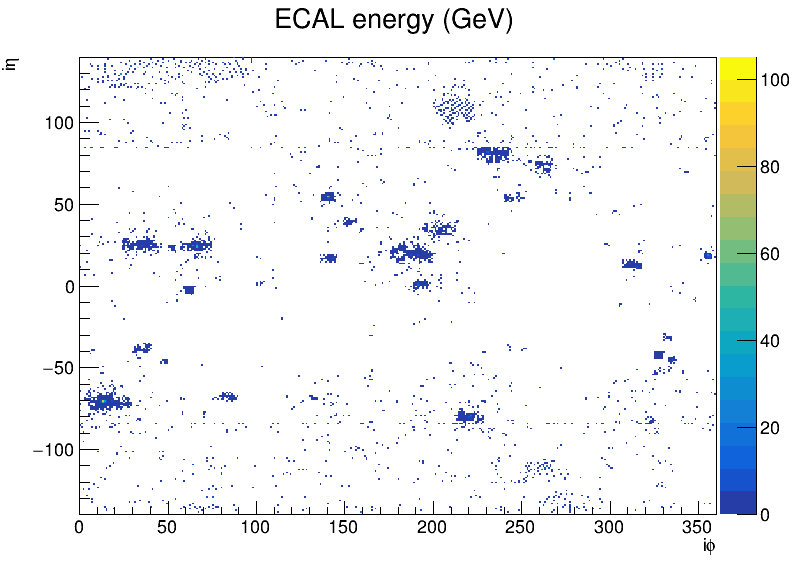

In [10]:
canvas = ROOT.TCanvas("canvas", "Profile Histogram", 800, 600)
histograms['ECAL_energy'].Draw("colz")
ROOT.gPad.Update()
# Show the canvas
canvas.Draw()
canvas.Update()
canvas.SaveAs('ECAL_energy.C')
canvas.SaveAs('ECAL_energy.png')

In [ ]:
c1.Draw()

In [ ]:
ECAL_energy= files_[0].Get('fevt/ECAL_energy')

In [ ]:
type(ECAL_energy)

In [ ]:
histogram = ECAL_energy

In [ ]:
canvas = ROOT.TCanvas("canvas", "Profile Histogram", 800, 600)
ROOT.gStyle.SetOptStat(0)
histogram.SetTitle("ECAL energy (GeV)")
histogram.Draw("colz")  # "E" option draws the histogram with errors


#ROOT.gStyle.SetOptTitle(0)
# Customize canvas and histogram properties if needed
#canvas.SetTitle("Profile Histogram")

#histogram.GetXaxis().SetTitle(histogram.axis().title)
#histogram.GetYaxis().SetTitle("Frequency")

ROOT.gPad.Update()
# Show the canvas
canvas.Draw()
canvas.Update()
canvas.SaveAs('ECAL_energy.C')
canvas.SaveAs('ECAL_energy.png')